# Tools of the Trade. Part 2


In this second part of the workshop, we will work with external, structured data with the library **Pandas**.

## Pandas

Pandas is one of the most popular libraries for data analysis in python because of its ability to handle structured data with ease. It is directly inspired by `R`'s DataFrame manipulation. You will see that all of what we learned in `np` will come handy here.

In [504]:
# import pandas
import pandas as pd
print(pd.__version__)
# and numpu
import numpy as np

1.2.1


As we did with NumPy, we use an `alias` for Pandas, `pd`. This is very common.

### The `pd.Series` Class

Pandas has two classes that are of particular interest for us. The `pd.Series` and the `pd.DataFrame`. Since a `pd.DataFrame` is composed of `pd.Series`, we start from `pd.Series`. What is it? A `pd.Series` is an **ordered and labeled unidimensional collection of homogenous elements**. Let's compare this to a `np.array`:

1. *Collection*, both the `np.array` and the `pd.Series`  can contain more than one element (but also 1 or 0 elementes);
2. *Ordered*, both the `np.array` and the `pd.Series` contain information about the order of the elements they contain;
3. *Unidimensional* unlike a `np.array`, a `pd.Series` always has a unidimensional shape: it is a vector.
4. *Homogenous* both the `pd.Series` and the `np.array` can contain only elements of the same type (for example, `float` or `integer`), following their `dtype`. 


The two classes are indeed quite similar, with a major restriction for `pd.Series` (only one dimension), but also a brand new feature: labels -- more precisely, the `index`.

Let's create our first two `pd.Series`.

In [505]:
# You can proceed from a list
first_ser = [1, 2, 3, 5, 7, 11]
first_ser = pd.Series(first_ser)
# But also from a np.array
# Here we create a random boolean vector
seed = 12345
rng = np.random.default_rng(seed)
second_ser = rng.choice([1,0], 6)
# dtype argument!
second_ser = pd.Series(second_ser, dtype='bool')

print(f"This is my first Series:\n{first_ser}\n")
print(f"This is my second Series:\n{second_ser}\n")

This is my first Series:
0     1
1     2
2     3
3     5
4     7
5    11
dtype: int64

This is my second Series:
0    False
1     True
2    False
3     True
4     True
5    False
dtype: bool



After the previous introduction, you will be hardly surprised to know that the `pd.Series` has many of the same features the `np.array` has. You already notice it has a `dtype`. Well, it also has a `shape` (which will always be unidimensional). Moreover, you can use `pd.Series` all of the `np` universal functions you already encounteed.

<div class="alert alert-block alert-success">
    <b>New <code>dtype</code>s</b> Pandas supports all of the NumPy-defined <code>dtype</code>s. However, it also adds some new <code>dtype</code> of its own. Like the <a href=https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html>Categorical</a> <code>dtype</code> and the <a href=https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html>StringDtype</a>.
</div>

In [506]:
# Some old friends
print(f"This is the shape our second Series {second_ser.shape}")
print(f"This is the dtype of our second Series {second_ser.dtype}")
# You can convert the dtype of a Series using the usual .astype() method
second_ser = second_ser.astype("int16")
print(f"This is the new dtype of our second Series {second_ser.dtype}")
print(f"And this is how our second Series looks now\n{second_ser}")
print(f"This the arcsin of our second Series in PIs:\n{np.arcsin(second_ser)/np.pi}")
print(f"This our first Series, again:\n{first_ser}\n")
print(f"The sums of our two Series:\n{first_ser + second_ser}")

This is the shape our second Series (6,)
This is the dtype of our second Series bool
This is the new dtype of our second Series int16
And this is how our second Series looks now
0    0
1    1
2    0
3    1
4    1
5    0
dtype: int16
This the arcsin of our second Series in PIs:
0    0.0
1    0.5
2    0.0
3    0.5
4    0.5
5    0.0
dtype: float32
This our first Series, again:
0     1
1     2
2     3
3     5
4     7
5    11
dtype: int64

The sums of our two Series:
0     1
1     3
2     3
3     6
4     8
5    11
dtype: int64


### The `index` of a `pd.Series`

The `pd.Series` has a lot in common with the `nd.array`, but they also have a fundamental difference: a `pd.Series` associates an label to each of its element -- like a python basic dictionary. The labels are stored in the `index` attribute. Now, the behavior of the `pd.Series` depends crucially on these labels, as we shall see below. 

By default the `Index` of a `pd.Series` (and a `pd.DataFrame`!) is a simple range starting from `0`.

In [507]:
print(f"This is the index of the first Series: {first_ser.index}")

This is the index of the first Series: RangeIndex(start=0, stop=6, step=1)


But we can easily change that. Here we assign a random label to each element in the `first_ser` -- the `index` does not have to be numeric, but we will stick with that here.

In [509]:
new_ind = rng.choice([0, 1, 2, 3, 4, 5], size=first_ser.shape, replace=False)
first_ser.index = new_ind
print(f"This is the new index of the first Series: {first_ser.index}")
print(first_ser)

This is the new index of the first Series: Int64Index([0, 5, 2, 3, 4, 1], dtype='int64')
0     1
5     2
2     3
3     5
4     7
1    11
dtype: int64


Notice how the behavior of `sum` (or `+`) changes!

In [510]:
print(f"This is our first Series:\n{first_ser}")
print(f"This is our second Series:\n{second_ser}")
print(f"Is this their sum?!\n{first_ser+second_ser}")

This is our first Series:
0     1
5     2
2     3
3     5
4     7
1    11
dtype: int64
This is our second Series:
0    0
1    1
2    0
3    1
4    1
5    0
dtype: int16
Is this their sum?!
0     1
1    12
2     3
3     6
4     8
5     2
dtype: int64


What's happening here? `pd` is matching the `index` before summing. **Elements with the same label gets summed**. When we have non-corresponding labels, we get a `np.nan`. The general rules is: *`pd` will match the index of `pd.Series` and `pd.DataFrame` when an operation involve two or more of them* -- so, beware of passing `pd.Series` and `pd.DataFrame` with the right `index`.

In [511]:
# Re-index the first index again
new_ind = rng.choice([0, 1, 2, 3, 7, 6], size=first_ser.shape, replace=False)
first_ser.index = new_ind

print(f"This is our first Series, re-indexed:\n{first_ser}")
print(f"This is our second Series:\n{second_ser}")
print(f"Their new sum:\n{first_ser+second_ser}")

This is our first Series, re-indexed:
1     1
3     2
0     3
7     5
2     7
6    11
dtype: int64
This is our second Series:
0    0
1    1
2    0
3    1
4    1
5    0
dtype: int16
Their new sum:
0    3.0
1    2.0
2    7.0
3    3.0
4    NaN
5    NaN
6    NaN
7    NaN
dtype: float64


### Selection (and Changing the Elements of a `Pd.Series`)

Selection is a pivotal part of Pandas. It turns out the selection process is similar to `np` selection, with the difference that you have to be explicit on the feature you are using for selection: are you selecting on positions -- `pd.Series` are ordered -- or on `index`? We use the `.iloc[]` selector for positions and `.loc[]` for labels.

Exactly like the `np.array`, we often perform the operation of selecting from `pd.Series` and replacing. 

In [512]:
print(f"Again, this is the first Series:\n{first_ser}")

# We select the second element in the Series
print(f"This is the second element in firts Series: {first_ser.iloc[1]}")
# We select the element with label 1 in the Series
print(f"This is the element with label \"1\" in firts Series: {first_ser.loc[1]}")

Again, this is the first Series:
1     1
3     2
0     3
7     5
2     7
6    11
dtype: int64
This is the second element in firts Series: 2
This is the element with label "1" in firts Series: 1


We can use all the same techniques we used for selection on `np.array`, slicing, boolean masks and fancy indexing.

#### 1. Slicing

You can slice both the `index`, using `.loc[]`, and positions, using `.iloc[]`. The behavior of the two selector when slicing is somehow different -- which makes everything a little confusing.

<div class="alert alert-block alert-success">
    <b>Slicing in <code>loc[]</code> and <code>iloc[]</code></b> The way <code>loc[]</code> and <code>loc[]</code> deals with slicing is different, in subtle ways. We will not explore all of them here, but look at <a href=https://stackoverflow.com/questions/31593201/how-are-iloc-and-loc-different>this wonderful Stackoverflow answer</a> for a detailed comparison.
</div>

In [513]:
print(f"The first Series:\n{first_ser}")

# Slicing. Notice the different behavior
print(f"Slicing on positions:\n{first_ser.iloc[:2]}")
print(f"Slicing on index:\n{first_ser.loc[:2]}")

The first Series:
1     1
3     2
0     3
7     5
2     7
6    11
dtype: int64
Slicing on positions:
1    1
3    2
dtype: int64
Slicing on index:
1    1
3    2
0    3
7    5
2    7
dtype: int64


#### 2. Masking

As for `np.array` we can use `bool`-valued `pd.Series` or `np.array` for selection. To do this, we will simply pass our `bool`-valued object inside a `loc[]` selector. 

Beware that `pd` will match the `index` of the `bool` `pd.Series` with the `index` of the selected `pd.Series`: once again, when two `pd.Series` interact, labels are matched. On the other hand, `pd`  match the `bool` `np.array` with the selected `pd.Series` based on positions. An example will clarify.

We will use the self-explicatory method `to_numpy()` to transform the `pd.Series` into a `np.array`. We will also replace the selected values with new values as we did with `np.array`.

In [514]:
print(f"The first Series:\n{first_ser}")

# We build a Boolean mask starting with. Only works with loc
mask = second_ser.astype(bool)
# We have to match the index of the mask with the index of the Series
mask.index = rng.choice(first_ser.index, size=(6,), replace=False)
print(f"This is the mask as a Series:\n{mask}")
# Notice how pd has matched indices
print(f"This is the first Series masked by a Series:\n{first_ser.loc[mask]}")
mask = mask.to_numpy()
print(f"This is the mask as an Array: {mask}")
print(f"This is first Series masked by an Array:\n{first_ser.loc[mask]}")
#Replace the masked values with Nans
first_ser.loc[mask] = np.nan
print(f"This is first Series after replacement of values:\n{first_ser}")

The first Series:
1     1
3     2
0     3
7     5
2     7
6    11
dtype: int64
This is the mask as a Series:
2    False
7     True
0    False
6     True
3     True
1    False
dtype: bool
This is the first Series masked by a Series:
3     2
7     5
6    11
dtype: int64
This is the mask as an Array: [False  True False  True  True False]
This is first Series masked by an Array:
3    2
7    5
2    7
dtype: int64
This is first Series after replacement of values:
1     1.0
3     NaN
0     3.0
7     NaN
2     NaN
6    11.0
dtype: float64


#### 3. Fancy Indexing

Finally, we can go with fancy indexing on `pd.Series` as well -- even if I do not think this is the official name. This works both with `iloc[]` and with `loc[]`.

**Beware**: there is **no** fancy indexing on `pd.DataFrame` in the same way as there is on `np.array`. If you are in a situation where you need to use fancy indexing on `pd.DataFrame`, your best option is to convert the `pd.DataFrame` to a `np.array`, select the `np.array`, then convert the results to a `pd.DataFrame` or `pd.Sereis` if needed.

Also, this is a good time to notice that an `index` does not have to contain unique labels...but it should! We can use the method <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html>`.reset_index()`</a> to enforce that.

In [515]:
# Randomly (repeated) sample from the first Series using fancy indexing
print(f"The first Series:\n{first_ser}")

# We create a random order based on labels by sampling the indices of the series
random_order = rng.choice(first_ser.index, size=(10,))
# Notice the use of np.arange and shape
random_order = rng.choice(np.arange(first_ser.shape[0]), size=(10,))
selected_first = first_ser.iloc[random_order]
print(f"This is a random selection based on position:\n{selected_first}")
# Reindex
selected_first = selected_first.reset_index()
print(f"This is the same selection, but with indices resetted:\n{selected_first}")

The first Series:
1     1.0
3     NaN
0     3.0
7     NaN
2     NaN
6    11.0
dtype: float64
This is a random selection based on position:
1     1.0
1     1.0
1     1.0
7     NaN
2     NaN
6    11.0
7     NaN
7     NaN
3     NaN
6    11.0
dtype: float64
This is the same selection, but with indices resetted:
   index     0
0      1   1.0
1      1   1.0
2      1   1.0
3      7   NaN
4      2   NaN
5      6  11.0
6      7   NaN
7      7   NaN
8      3   NaN
9      6  11.0


#### New Elements

The selector `loc[]` can be used to add *one* new element to the a `pd.Series`. If we need to add multiple elements, the most efficient way (when possible) is to store the new elements in another `pd.Series` and then use  the <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html>`pd.concat`</a> function, which can concatenate 2 or more `pd.Series` as well as `pd.DataFrame` (both along rows and columns!).

In [516]:
print(f"The first Series before adding a new element:\n{first_ser}")
# Add an element with label "new"
first_ser.loc['new'] = -99
print(f"The first Series after adding a new element:\n{first_ser}")
# Concatenation of the two series. Ignore_index automatically reset the indices
conc_series = pd.concat([first_ser, second_ser], ignore_index=True)
print(f"This is the concatenated Series: {conc_series}")

The first Series before adding a new element:
1     1.0
3     NaN
0     3.0
7     NaN
2     NaN
6    11.0
dtype: float64
The first Series after adding a new element:
1       1.0
3       NaN
0       3.0
7       NaN
2       NaN
6      11.0
new   -99.0
dtype: float64
This is the concatenated Series: 0      1.0
1      NaN
2      3.0
3      NaN
4      NaN
5     11.0
6    -99.0
7      0.0
8      1.0
9      0.0
10     1.0
11     1.0
12     0.0
dtype: float64


### Our Last Stop: The `pd.DataFrame`

You made untill the last section of the workshop. Here, we will be using the most popular object of Pandas: the `pd.DataFrame`. Now, the `pd.DataFrame` is a **2-dimensional ordered and labeled collection of possibly inhomogenous data**:

1. *2-dimensional*, a `pd.DataFrame` has rows and columns
2. *Ordered*, a `pd.DataFrame` has an order for both the columns and the rows it contains;
3. *Labeled*, a `pd.DataFrame` has a label for both the rows and the columns. 
4. *Inhomogenous (possibly)*, the columns of a `pd.DataFrame` may have different `dtype`s.

Effectively, a `pd.DataFrame` is composed by different `pd.Series`, one per column.

#### Reading the Data

To begin, we will load some data. The data we will work with comes in a `csv` file. This is common, but not necessary: `pd` supports a wide range of different (tabular) file formats. We will use the function <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html>`read_csv`</a> to load the data. Notice that we indicate a URL as the source of the data and `pd` deals with it with no problems -- as long as the URL is publicly accessible. Most often, we will indicate a local path to a file we store in our machine instead of a URL. Moreover, the files we will load are csv...*almost* . Actually, their first rows are not well formatted. We tell `pd` to skip those using the `skiprow` argument. The result of loading data will be two `pd.DataFrame`s, one per file.

About the data. We will load publicly-available tracking data from Metrica, containing the tracking data for an anonymized soccer match. That is to say, the file contains the x-y position of each player (and the ball) for the entirity of the match. The data is taken every 0.04 seconds -- corresponding to a "frame".

In [517]:
# Just URLs to the data
home_url = 'https://github.com/metrica-sports/sample-data/blob/master/data/Sample_Game_2/Sample_Game_2_RawTrackingData_Home_Team.csv?raw=true'
away_url = 'https://github.com/metrica-sports/sample-data/blob/master/data/Sample_Game_2/Sample_Game_2_RawTrackingData_Away_Team.csv?raw=true'

# Load the data from a csv file
home_tracking = pd.read_csv(home_url, skiprows=2)
away_tracking = pd.read_csv(away_url, skiprows=2)
# Usual dtypes
print(f"These are the dtypes:\n{home_tracking.dtypes}\n")
print(f"These is the shape:\n{home_tracking.shape}\n")

# this last line is useful to see 10 rows from the DataFrame.
# This is specific to Jupyter notebooks
away_tracking

These are the dtypes:
Period           int64
Frame            int64
Time [s]       float64
Player11       float64
Unnamed: 4     float64
Player1        float64
Unnamed: 6     float64
Player2        float64
Unnamed: 8     float64
Player3        float64
Unnamed: 10    float64
Player4        float64
Unnamed: 12    float64
Player5        float64
Unnamed: 14    float64
Player6        float64
Unnamed: 16    float64
Player7        float64
Unnamed: 18    float64
Player8        float64
Unnamed: 20    float64
Player9        float64
Unnamed: 22    float64
Player10       float64
Unnamed: 24    float64
Player12       float64
Unnamed: 26    float64
Player13       float64
Unnamed: 28    float64
Player14       float64
Unnamed: 30    float64
Ball           float64
Unnamed: 32    float64
dtype: object

These is the shape:
(141156, 33)



,Period,Frame,Time [s],Player25,Unnamed: 4,Player15,Unnamed: 6,Player16,Unnamed: 8,Player17,...,Player22,Unnamed: 20,Player23,Unnamed: 22,Player24,Unnamed: 24,Player 26,Unnamed: 26,Ball,Unnamed: 28
0,1,1,0.04,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
1,1,2,0.08,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
2,1,3,0.12,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
3,1,4,0.16,0.01218,0.51763,0.32836,0.81847,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
4,1,5,0.20,0.01218,0.51763,0.32783,0.81847,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141151,2,141152,5646.08,0.91211,0.48311,0.49028,-0.05000,0.48911,0.44788,0.59788,...,NaN,NaN,0.26855,0.61845,0.36760,0.12496,0.44966,0.41572,NaN,NaN
141152,2,141153,5646.12,0.91191,0.48311,0.49028,-0.05000,0.48894,0.44761,0.59767,...,NaN,NaN,0.26855,0.61845,0.36760,0.12496,0.44983,0.41550,NaN,NaN
141153,2,141154,5646.16,0.91168,0.48311,0.49028,-0.05000,0.48888,0.44684,0.59763,...,NaN,NaN,0.26855,0.61845,0.36760,0.12496,0.44997,0.41485,NaN,NaN
141154,2,141155,5646.20,0.91151,0.48311,0.49028,-0.05000,0.48895,0.44457,0.59775,...,NaN,NaN,0.26855,0.61845,0.36760,0.12496,0.45017,0.41515,NaN,NaN


The first thing we need to do is renaming the columns. Most of their names do not make any sense.
I learn from <a href=https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking/blob/master/Metrica_IO.py>Laurie's code</a> itself that the first column dedicated to each player -- such as "Player25" -- contains the x-coordinate of the player for that frame. The column immediately after that -- such as "Unnamed:4" -- contains the y-coordinate for the very same player.

Based on this, let's use the method <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html>`.rename()`</a> of a `pd.DataFrame` to do create nicer names for the column. This method takes a `dict` in input where the old names are mapped onto new ones. We start with renaming the ball columns.

In [518]:
ball_names_home = {'Ball': 'ball_x', 'Unnamed: 32': 'ball_y'}
ball_names_away = {'Ball': 'ball_x', 'Unnamed: 28': 'ball_y'}

home_tracking = home_tracking.rename(columns=ball_names_home)
away_tracking = away_tracking.rename(columns=ball_names_away)
home_tracking

,Period,Frame,Time [s],Player11,Unnamed: 4,Player1,Unnamed: 6,Player2,Unnamed: 8,Player3,...,Player10,Unnamed: 24,Player12,Unnamed: 26,Player13,Unnamed: 28,Player14,Unnamed: 30,ball_x,ball_y
0,1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.16,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,0.20,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141151,2,141152,5646.08,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,NaN,NaN,0.40837,0.14449,0.51032,0.94554,0.27962,0.36700,NaN,NaN
141152,2,141153,5646.12,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,NaN,NaN,0.40837,0.14449,0.51031,0.94626,0.28009,0.36718,NaN,NaN
141153,2,141154,5646.16,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,NaN,NaN,0.40837,0.14449,0.51029,0.94711,0.28031,0.36726,NaN,NaN
141154,2,141155,5646.20,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,NaN,NaN,0.40837,0.14449,0.51028,0.94792,0.28059,0.36706,NaN,NaN


We continue with the players from the away and home teams.

In [519]:
new_names_home = {}
new_names_away = {}
# We also take track of the players in the home and away sides
players = []


# We will loop and create names through the loop
for df, name_dic in zip([home_tracking, away_tracking], [new_names_home, new_names_away]):
     # You can access the old names from the attribute .columns 
    for i, col in enumerate(df.columns):
        # if the column name begins with "Player"
        if col[:6] == "Player":
            # create a new name. We use join() to merge strings
            # We take the number as everything after Player
            new_name = "_".join(['player', col[6:], 'x']) 
            # Save the new name in the dict
            name_dic[col] = new_name
            players.append("_".join(['player', col[6:]]))

        elif col[:7] == "Unnamed":
            # Create a new name and save it, as before
            # Notice how we must check the column before this to retrieve the right shirt number
            new_name = "_".join(['player', df.columns[i-1][6:], 'y']) 
            # Save the new name in the dict
            name_dic[col] = new_name

print(f"This is how the home dictionary looks like:\n{new_names_home}")
# Change the names in both df
home_tracking = home_tracking.rename(columns=new_names_home)
away_tracking = away_tracking.rename(columns=new_names_away)
# Just visualize the df
away_tracking

This is how the home dictionary looks like:
{'Player11': 'player_11_x', 'Unnamed: 4': 'player_11_y', 'Player1': 'player_1_x', 'Unnamed: 6': 'player_1_y', 'Player2': 'player_2_x', 'Unnamed: 8': 'player_2_y', 'Player3': 'player_3_x', 'Unnamed: 10': 'player_3_y', 'Player4': 'player_4_x', 'Unnamed: 12': 'player_4_y', 'Player5': 'player_5_x', 'Unnamed: 14': 'player_5_y', 'Player6': 'player_6_x', 'Unnamed: 16': 'player_6_y', 'Player7': 'player_7_x', 'Unnamed: 18': 'player_7_y', 'Player8': 'player_8_x', 'Unnamed: 20': 'player_8_y', 'Player9': 'player_9_x', 'Unnamed: 22': 'player_9_y', 'Player10': 'player_10_x', 'Unnamed: 24': 'player_10_y', 'Player12': 'player_12_x', 'Unnamed: 26': 'player_12_y', 'Player13': 'player_13_x', 'Unnamed: 28': 'player_13_y', 'Player14': 'player_14_x', 'Unnamed: 30': 'player_14_y'}


,Period,Frame,Time [s],player_25_x,player_25_y,player_15_x,player_15_y,player_16_x,player_16_y,player_17_x,...,player_22_x,player_22_y,player_23_x,player_23_y,player_24_x,player_24_y,player_ 26_x,player_ 26_y,ball_x,ball_y
0,1,1,0.04,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
1,1,2,0.08,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
2,1,3,0.12,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
3,1,4,0.16,0.01218,0.51763,0.32836,0.81847,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
4,1,5,0.20,0.01218,0.51763,0.32783,0.81847,0.30734,0.55182,0.32235,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141151,2,141152,5646.08,0.91211,0.48311,0.49028,-0.05000,0.48911,0.44788,0.59788,...,NaN,NaN,0.26855,0.61845,0.36760,0.12496,0.44966,0.41572,NaN,NaN
141152,2,141153,5646.12,0.91191,0.48311,0.49028,-0.05000,0.48894,0.44761,0.59767,...,NaN,NaN,0.26855,0.61845,0.36760,0.12496,0.44983,0.41550,NaN,NaN
141153,2,141154,5646.16,0.91168,0.48311,0.49028,-0.05000,0.48888,0.44684,0.59763,...,NaN,NaN,0.26855,0.61845,0.36760,0.12496,0.44997,0.41485,NaN,NaN
141154,2,141155,5646.20,0.91151,0.48311,0.49028,-0.05000,0.48895,0.44457,0.59775,...,NaN,NaN,0.26855,0.61845,0.36760,0.12496,0.45017,0.41515,NaN,NaN


In a `pd.DataFrame`, you can use one of the columns itself as its `index`. This is convenient when the original file already contains an `index`: no need to repeat information. Here, we can use the "frame" column, which accounts for time in our data. We will do this using the <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html>`.set_index()`</a> method of `pd.DataFrame`. Notice that the "frame" column will be dropped from the columns, unless we explicitly set the positional (optional) argument `drop` to `False` (which we don't do here).

In [520]:
# New index
home_tracking = home_tracking.set_index('Frame')
away_tracking = away_tracking.set_index('Frame')
home_tracking

,Period,Time [s],player_11_x,player_11_y,player_1_x,player_1_y,player_2_x,player_2_y,player_3_x,player_3_y,...,player_10_x,player_10_y,player_12_x,player_12_y,player_13_x,player_13_y,player_14_x,player_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,5646.08,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,...,NaN,NaN,0.40837,0.14449,0.51032,0.94554,0.27962,0.36700,NaN,NaN
141153,2,5646.12,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,...,NaN,NaN,0.40837,0.14449,0.51031,0.94626,0.28009,0.36718,NaN,NaN
141154,2,5646.16,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,...,NaN,NaN,0.40837,0.14449,0.51029,0.94711,0.28031,0.36726,NaN,NaN


Ok, now we convert the 0-1 coordinates (both x and y) to meters. We say the field is 105 meters long (x coordinate) and 68 meters large (y coordinate). We take advantage of universal functions to multiply the  coordinates in our columns. We will use the new `StringDtype` and its special methods to find the right columns among the columns of the two `pd.DataFrame`s. In particular we will use `.contains()` to find which column name contains the words we are looking for.

In [521]:
# Collect relevant xs and ys columns

# First, change dtype of the columns list
home_tracking.columns = home_tracking.columns.astype(pd.StringDtype())
away_tracking.columns = away_tracking.columns.astype(pd.StringDtype())
# Second, check which columns are relevant using str.contains()
home_x_selector = (home_tracking.columns.str.contains('player')) & (home_tracking.columns.str.contains('_x')) 
home_y_selector = (home_tracking.columns.str.contains('player')) & (home_tracking.columns.str.contains('_y')) 
away_x_selector = (away_tracking.columns.str.contains('player')) & (away_tracking.columns.str.contains('_x')) 
away_y_selector = (away_tracking.columns.str.contains('player')) & (away_tracking.columns.str.contains('_y')) 
# These are boolean mask. To get the names of the columns we apply them to the columns attribute of the Dfs
# Notice, we do not use .loc and .iloc when making selection on the .columns attribute
home_x_selector = home_tracking.columns[home_x_selector]
home_y_selector = home_tracking.columns[home_y_selector]
away_x_selector = away_tracking.columns[away_x_selector]
away_y_selector = away_tracking.columns[away_y_selector]


print(f"This is the selector for the Xs:\n{home_x_selector}\n")
# Convert xs to meters
home_tracking[home_x_selector] = home_tracking[home_x_selector] * 105
away_tracking[away_x_selector] = away_tracking[away_x_selector] * 68

# Convert ys to meters
home_tracking[home_y_selector] = home_tracking[home_y_selector] * 68
away_tracking[away_y_selector] = away_tracking[away_y_selector] * 68

home_tracking

This is the selector for the Xs:
Index(['player_11_x', 'player_1_x', 'player_2_x', 'player_3_x', 'player_4_x',
       'player_5_x', 'player_6_x', 'player_7_x', 'player_8_x', 'player_9_x',
       'player_10_x', 'player_12_x', 'player_13_x', 'player_14_x'],
      dtype='object')



,Period,Time [s],player_11_x,player_11_y,player_1_x,player_1_y,player_2_x,player_2_y,player_3_x,player_3_y,...,player_10_x,player_10_y,player_12_x,player_12_y,player_13_x,player_13_y,player_14_x,player_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,98.98875,34.28084,68.05260,19.45140,71.1396,29.10604,73.3761,37.81208,...,52.7037,41.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,98.98875,34.28084,68.05260,19.45140,71.1396,29.10604,73.3761,37.81208,...,52.7037,41.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,98.98875,34.28084,68.05260,19.45140,71.1396,29.10604,73.3761,37.81208,...,52.7037,41.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,98.98875,34.28084,68.05260,19.45140,71.1396,29.10604,73.3761,37.81208,...,52.7037,41.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,98.98875,34.28084,68.05260,19.45140,71.1396,29.10604,73.3761,37.81208,...,52.7037,41.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,5646.08,6.59925,34.84524,40.42395,10.44208,23.6859,28.12140,28.4991,21.90212,...,NaN,NaN,42.87885,9.82532,53.58360,64.29672,29.36010,24.95600,NaN,NaN
141153,2,5646.12,6.59925,34.84524,40.42395,10.44208,23.6859,28.12140,28.4991,21.90212,...,NaN,NaN,42.87885,9.82532,53.58255,64.34568,29.40945,24.96824,NaN,NaN
141154,2,5646.16,6.59925,34.84524,40.42395,10.44208,23.6859,28.12140,28.4991,21.90212,...,NaN,NaN,42.87885,9.82532,53.58045,64.40348,29.43255,24.97368,NaN,NaN


Almost there. As a last step we create another `pd.DataFrame` containing the data regarding the ball. We drop the ball columns in both the away tracking and home tracking data.

We introcuce here a new way to select that works for selecting *columns* from `pd.DataFrame`: simply use `[]` preceded by neither `iloc` nor `loc` to select columns. This works as a sort of fancy indexing on columns name. It is actually very intuitive.

`pd` will complain, mainly due to the way we created the `ball` `DataFrame`. It's fine.

In [522]:
# New dataframe created using fancy indexing on columns
ball = home_tracking[['Period', 'Time [s]', 'ball_x', 'ball_y']]

# Drop the columns using .iloc[] selector on the columns
home_tracking = home_tracking.iloc[:,:-2]

# Drop the columns using the method drop
away_tracking = away_tracking.drop(columns=['ball_x', 'ball_y'])

# We also need to conver the ball coordinates to meters
ball['ball_x'] = ball['ball_x']  * 105
ball['ball_y'] = ball['ball_y'] * 68
ball

<ipython-input-522-f43e12f7f1f7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ball['ball_x'] = ball['ball_x']  * 105
<ipython-input-522-f43e12f7f1f7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ball['ball_y'] = ball['ball_y'] * 68


,Period,Time [s],ball_x,ball_y
Frame,,,,
1,1,0.04,NaN,NaN
2,1,0.08,NaN,NaN
3,1,0.12,NaN,NaN
4,1,0.16,NaN,NaN
5,1,0.20,NaN,NaN
...,...,...,...,...
141152,2,5646.08,NaN,NaN
141153,2,5646.12,NaN,NaN
141154,2,5646.16,NaN,NaN


#### Attacking Directions and Goalkeepers

Let's start our analysis by  getting the attacking directions of each team and finding their goalkeepers.

As you probably know, during the kick-off both teams are confined in their defensive halves. We can use this to find the attacking directions. We will also use a little `matplotlib` to visualize the kick-off. 

This is the home side Xs at kick-off:
player_11_x    99.53055
player_1_x     68.02635
player_2_x     71.15115
player_3_x     71.55015
player_4_x     67.65780
player_5_x     60.14715
player_6_x     63.48720
player_7_x     61.28010
player_8_x     55.98180
player_9_x     52.64700
player_10_x    52.54830
player_12_x         NaN
player_13_x         NaN
player_14_x         NaN
Name: 51, dtype: float64

This is the home side Xs at kick-off:
player_25_x      0.21420
player_15_x     26.19904
player_16_x     20.97800
player_17_x     21.38804
player_18_x     24.91384
player_19_x     33.65524
player_20_x     27.22856
player_21_x     29.44060
player_22_x     33.66748
player_23_x     34.14688
player_24_x     33.70420
player_ 26_x         NaN
Name: 51, dtype: float64

Inferred attack directions: {'home': 0, 'away': 1}


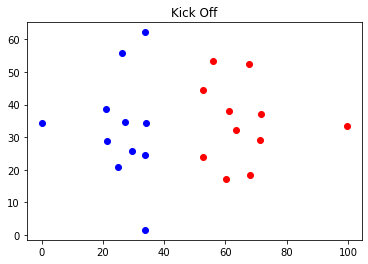

In [523]:
import matplotlib.pyplot as plt

# I get the kickoff frame from another dataset distributed by Metrica
ko_f = 51

# Select kick-off positions from home and away tracking using selections
# 1 is the kick-off frame
home_ko_xs = home_tracking.loc[ko_f, home_x_selector]
home_ko_ys = home_tracking.loc[ko_f, home_y_selector]
away_ko_xs = away_tracking.loc[ko_f, away_x_selector]
away_ko_ys = away_tracking.loc[ko_f, away_y_selector]
# Notice: we extracted a pd.Series
print(f"This is the home side Xs at kick-off:\n{home_ko_xs}\n")
print(f"This is the home side Xs at kick-off:\n{away_ko_xs}\n")


# Now visualize with matplotlib
fig,ax = plt.subplots()
ax.scatter(home_ko_xs, home_ko_ys, color='red')
ax.scatter(away_ko_xs, away_ko_ys, color='blue')
ax.set_y_lim = (0,68)
ax.set_x_lim = (0,105)
ax.set_title('Kick Off')

# Get the attacking direction using th
attack = {}
attack['home'] = 1 if home_ko_xs.mean() < 50 else 0
attack['away'] = 1 if away_ko_xs.mean() < 50 else 0
print(f"Inferred attack directions: {attack}")

##### Exercise 3: Find the keepers

Can you find the keepers? We assume they are the most defensive player during the kick-off. Use the methods <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html>`idxmin()`</a> and <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html>`idxmax()`</a> on `home_ko_xs` and `away_ko_xs` to find the columns containing the keepers' x coordinates.

In [ ]:
# Fill in the dictionary
keepers = {'home':'', 'away':''}

# Home keepers
if attack['home'] ==# 1: # you can write this simply as 'if attack['home']:'
    keepers['home'] = home_ko_xs.idxmin()
    keepers['away'] = away_ko_xs
else:
    keepers['home'] = home_ko_xs
    keepers['away'] = away_ko_xs

print(keepers)

#### Player's positions

It a good time to mention that `pd.DataFrame` have some very convenient plotting functions. They are far less powerful than `matplotlib` (which they use internally), but can be helpful for quick visualizations. For example, you can create histograms, scatter plots and boxplots.

Therefore, we can visually analyze the box-plots of the players x-positions to get how attacked minded they are. In just one line!

<AxesSubplot:>

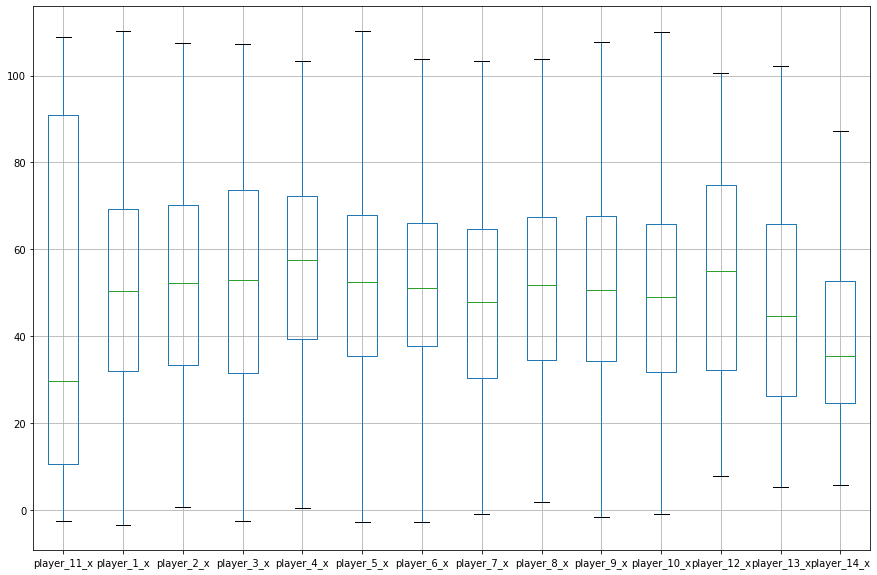

In [524]:
# boxplot is a little picky with inputs. We transform our x selectors in lists
home_tracking.boxplot(column=home_x_selector.to_list(), figsize=(15,10))

#### Exercise 4

Can you find the right/left/central players in the away team? Use `boxplot()` again.

In [ ]:
away_tracking.boxplot()

#### Total Distance

Finally, we will calculate the total distance each player runs (or walks) during the match. Doing this on `pd.DataFrame` turns out to be easy:

  1. We will calculate the x and y difference frame by frame. This is the distance covered in meters between frames on both axes.
  2. We will calculate the euclidean norm of the difference, getting the total distance traveled between frames.
  3. We will calculate and plot their cumulative sum.
  
There are few details that one may want to work out later. For example, you may want to account for the period change as well as for some imprecision in the tracking. I will let these further passages as an exercise.

Let's start with difference. We will use the <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html>`.diff()`</a> method, which "Calculates the difference of a Dataframe element compared with another element in the Dataframe", for example the row after the current one. We will store such differences in a new dataframe.

In [ ]:
# Difference, -1 tells to take the difference w.r.t. the next row
home_diff_df = home_tracking[(home_x_selector).union(home_y_selector)].diff(-1)
home_diff_df

Now we calculate the vectors' norm for the difference vectors. We select the right columns and then use our old friend `np.linalg.norm()`.

In [ ]:
# We will use string methods again
home_diff_df.columns = home_diff_df.columns.astype('string')

for player in players:
    # this is a boolean masks
    diff_components = home_diff_df.columns.str.contains(player)
    if np.any(diff_components):
        col_name = '_'.join([player, 'norm'])
        diff_components = home_diff_df.loc[:,diff_components]
        # This will calculate the norm...but it will return a numpy array
        vec_norm = np.linalg.norm(diff_components, axis=1)
        # Add the column to the home_tracking DataFrame. Notice the syntax
        home_tracking[col_name] = vec_norm

home_tracking

Finally, we can use the `.cumsum()` method to get the total distance. Here we must be careful with the `NaN`. We can safely assume that the player has not covered any distance if it has `NaN` norm. Thus, we will use the <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html>`fillna()`</a> function to quickly turn the `NaN`s in `0`. Here we also introduce a slightly abbreviated syntax. Instead of putting one command per line, we concatenate `.fillna()` and `.cumsum()` in the same line.

We plot our results with `ax.plot()`. We also use `cm` (colormap) to get different colors for our plotting...and a lot of lines and `matplotlib` objects to get the colorbar. Don't worry too much about it right now. 

In [ ]:
from matplotlib import cm
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colorbar import ColorbarBase


fig, ax = plt.subplots(figsize=(15,10))
divider = make_axes_locatable(ax)

color_range_list = []
colors_list = []
relevant_players = []
color_range = 0
for i, player in enumerate(players):
    player_in_columns = home_tracking.columns.str.contains(player)
    if any(player_in_columns):
        # Get the color
        color = cm.tab20(color_range)
        norm_column = "_".join([player, 'norm'])
        distance_column = '_'.join([player, 'distance'])
        home_tracking[distance_column] = home_tracking[norm_column].fillna(value=0).cumsum()
        ax.plot(home_tracking.index, home_tracking[distance_column], color=color)
        # Register different things we need for the colormap
        color_range_list.append(color_range)
        color_range += 0.06
        relevant_players.append(player)
        
        

# These lines are all of the colormap        
color_range_list.append(color_range)        
our_cmap = [cm.tab20(col) for col in color_range_list]        
our_cmap = colors.ListedColormap(our_cmap)
norm = cm.colors.BoundaryNorm(color_range_list, len(relevant_players))
scalar_mappable = cm.ScalarMappable(norm, cmap=our_cmap)
cax = divider.append_axes('right', size='5%', pad=0.05)
color_range_list = np.array(color_range_list[:-1]) + 0.03
cbar = fig.colorbar(cm.ScalarMappable(cmap=our_cmap, norm=norm), cax=cax, orientation='vertical',
                   ticks=color_range_list)
_= cbar.ax.set_yticklabels(relevant_players)



## Next Steps

This is it. The workshop should have put you in a position where you understand the `pd` and `np` official documentation and stackoverflow discussions. That is, you can finally Google your question and get an answer.

Actually, this is just the surface of what you can do with the instruments we in the workshop.  Of course we could not cover everything -- for example, `pd.DataFrame` has an <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html>`apply()`</a> method that is very similar to `np.apply_along_axes()`. We could not cover more advanced topics like <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html>`groupby()`</a> or <a href=https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html>MultiIndex</a>. However, the best way to learn this more advanced topic is to face issues where they are necessary. Really, the best way to proceed from here is to practice and expand what we learned! 